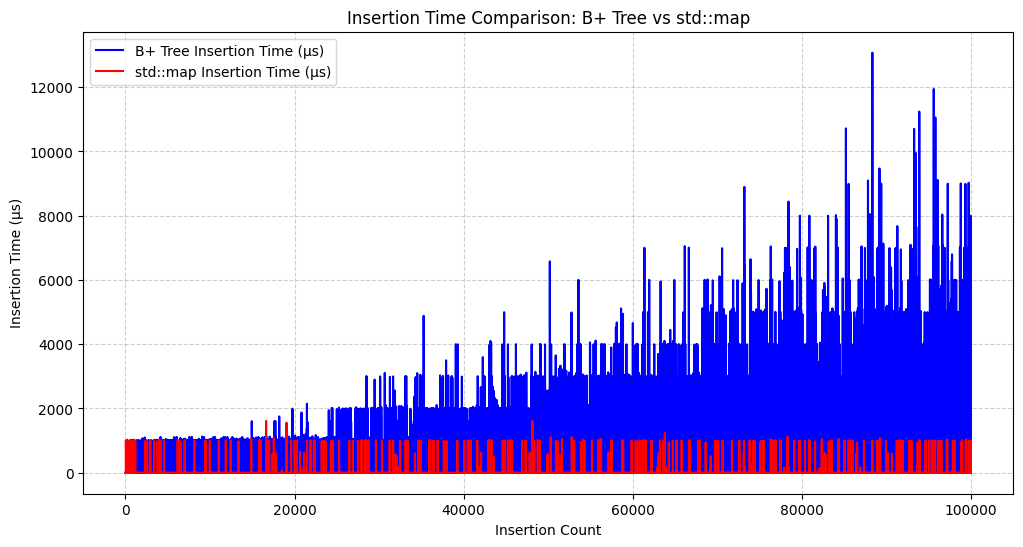

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load insertion times from file
try:
    with open("insertion_times.txt", "r") as file:
        times = file.readlines()
    
    # Convert to float and separate into B+ Tree and std::map
    times = [float(t.strip()) for t in times]
    bpt_times = times[::2]  # B+ Tree times
    map_times = times[1::2]  # std::map times

    # Plot the results
    plt.figure(figsize=(12, 6))

    plt.plot(bpt_times, label="B+ Tree Insertion Time (µs)", color="b")
    plt.plot(map_times, label="std::map Insertion Time (µs)", color="r")

    plt.xlabel("Insertion Count")
    plt.ylabel("Insertion Time (µs)")
    plt.title("Insertion Time Comparison: B+ Tree vs std::map")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

except FileNotFoundError:
    print("The file 'insertion_times.txt' was not found. Please run the C++ code first.")


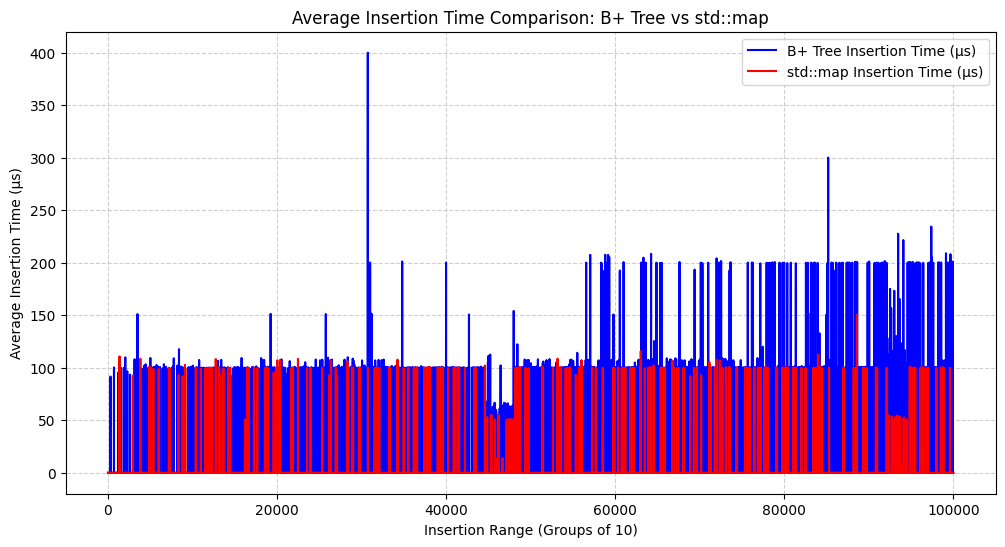

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Load insertion times from file
try:
    with open("insertion_times.txt", "r") as file:
        times = file.readlines()
    
    # Convert to float and separate into B+ Tree and std::map
    times = [float(t.strip()) for t in times]
    bpt_times = times[::2]  # B+ Tree times
    map_times = times[1::2]  # std::map times

    # Group times into ranges of size 10
    bpt_avg_times = [np.mean(bpt_times[i:i+10]) for i in range(0, len(bpt_times), 1)]
    map_avg_times = [np.mean(map_times[i:i+10]) for i in range(0, len(map_times), 1)]

    # Plot the results
    plt.figure(figsize=(12, 6))

    plt.plot(bpt_avg_times, label="B+ Tree Insertion Time (µs)", color="b")
    plt.plot(map_avg_times, label="std::map Insertion Time (µs)", color="r")

    plt.xlabel("Insertion Range (Groups of 10)")
    plt.ylabel("Average Insertion Time (µs)")
    plt.title("Average Insertion Time Comparison: B+ Tree vs std::map")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

except FileNotFoundError:
    print("The file 'insertion_times.txt' was not found. Please run the C++ code first.")


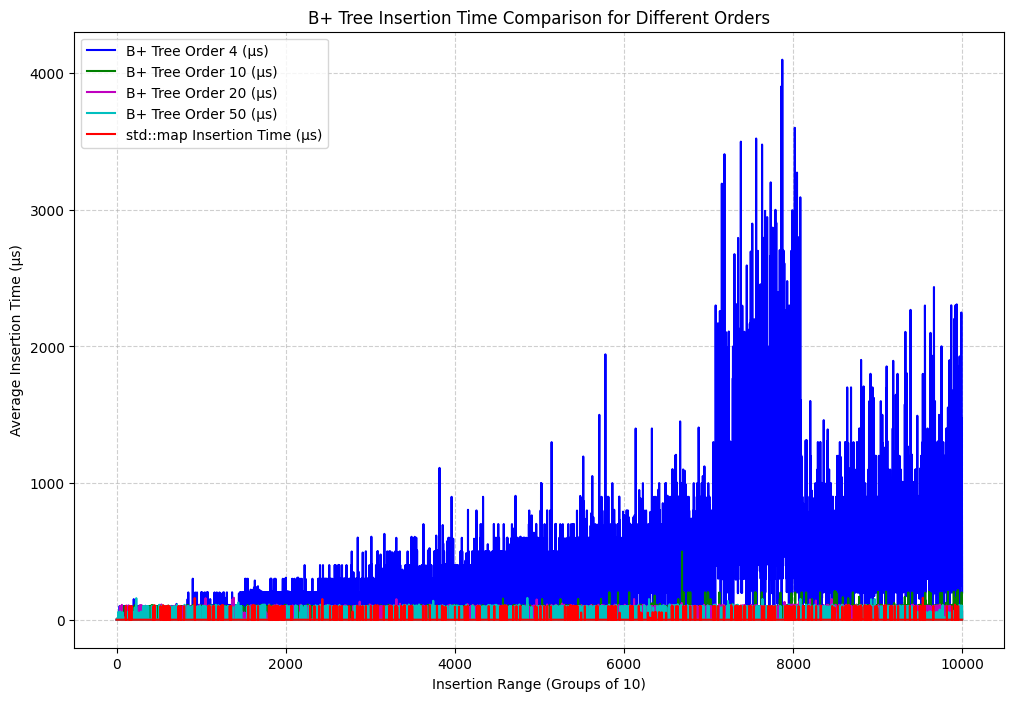

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Function to load times from a file
def load_times(filename):
    try:
        with open(filename, "r") as file:
            times = file.readlines()
        times = [float(t.strip()) for t in times]
        bpt_times = times[::2]  # B+ Tree times
        map_times = times[1::2]  # std::map times
        return bpt_times, map_times
    except FileNotFoundError:
        print(f"The file '{filename}' was not found.")
        return [], []

# Orders to test
orders = [4, 10, 20, 50]
colors = ['b', 'g', 'm', 'c']

plt.figure(figsize=(12, 8))

# Plot results for each order
for order, color in zip(orders, colors):
    bpt_times, map_times = load_times(f"insertion_times_order_{order}.txt")
    if bpt_times and map_times:
        bpt_avg_times = [np.mean(bpt_times[i:i+10]) for i in range(0, len(bpt_times), 10)]
        plt.plot(bpt_avg_times, label=f"B+ Tree Order {order} (µs)", color=color)

# Plot std::map reference
map_times_ref = load_times("insertion_times_order_10.txt")[1]
if map_times_ref:
    map_avg_times = [np.mean(map_times_ref[i:i+10]) for i in range(0, len(map_times_ref), 10)]
    plt.plot(map_avg_times, label="std::map Insertion Time (µs)", color="r")

plt.xlabel("Insertion Range (Groups of 10)")
plt.ylabel("Average Insertion Time (µs)")
plt.title("B+ Tree Insertion Time Comparison for Different Orders")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The file 'insertion_times_order_10.txt' was not found.


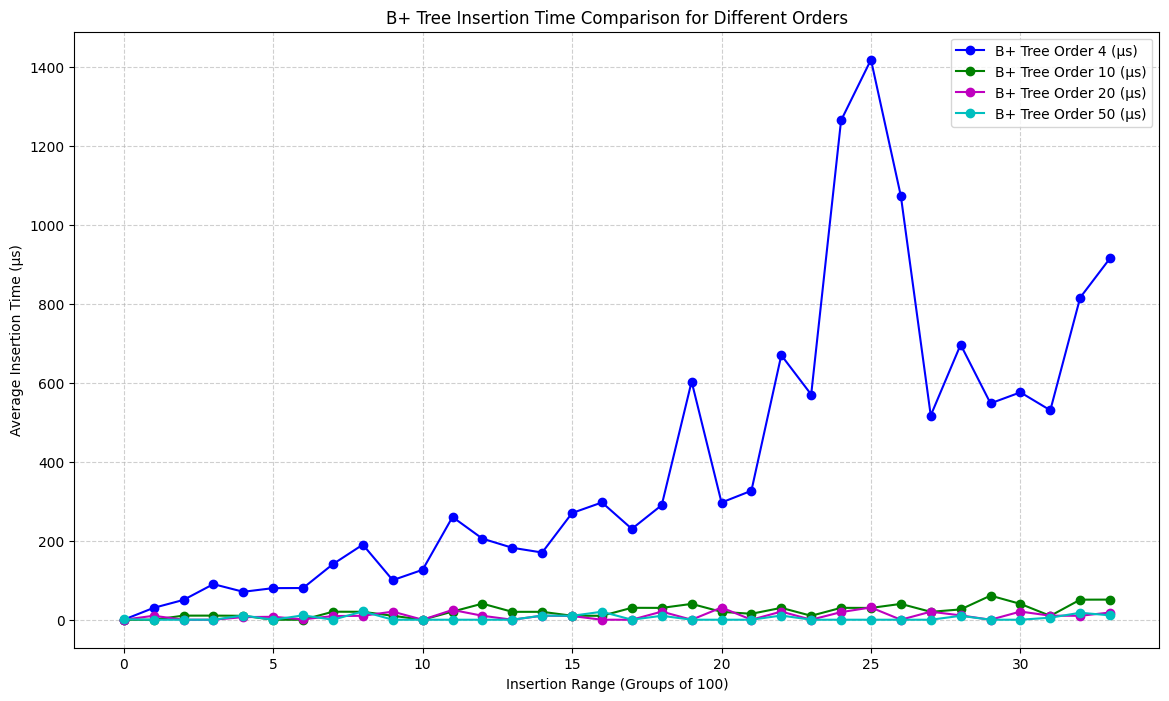

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to load times from a file
def load_times(filename):
    try:
        with open(filename, "r") as file:
            times = file.readlines()
        times = [float(t.strip()) for t in times]
        bpt_times = times[::2]  # B+ Tree times
        map_times = times[1::2]  # std::map times
        return bpt_times, map_times
    except FileNotFoundError:
        print(f"The file '{filename}' was not found.")
        return [], []

# Orders to test
orders = [4, 10, 20, 50]
colors = ['b', 'g', 'm', 'c']

plt.figure(figsize=(14, 8))

# Plot results for each order
for order, color in zip(orders, colors):
    bpt_times, map_times = load_times(f"insertion_times/insertion_times_order_{order}.txt")
    if bpt_times and map_times:
        bpt_avg_times = [np.mean(bpt_times[i:i+100]) for i in range(0, len(bpt_times), 3000)]
        plt.plot(bpt_avg_times, label=f"B+ Tree Order {order} (µs)", color=color, linestyle='-', marker='o')

# Plot std::map reference
map_times_ref = load_times("insertion_times_order_10.txt")[1]
if map_times_ref:
    map_avg_times = [np.mean(map_times_ref[i:i+100]) for i in range(0, len(map_times_ref), 3000)]
    plt.plot(map_avg_times, label="std::map Insertion Time (µs)", color="r", linestyle='--', marker='x')

plt.xlabel("Insertion Range (Groups of 100)")
plt.ylabel("Average Insertion Time (µs)")
plt.title("B+ Tree Insertion Time Comparison for Different Orders")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


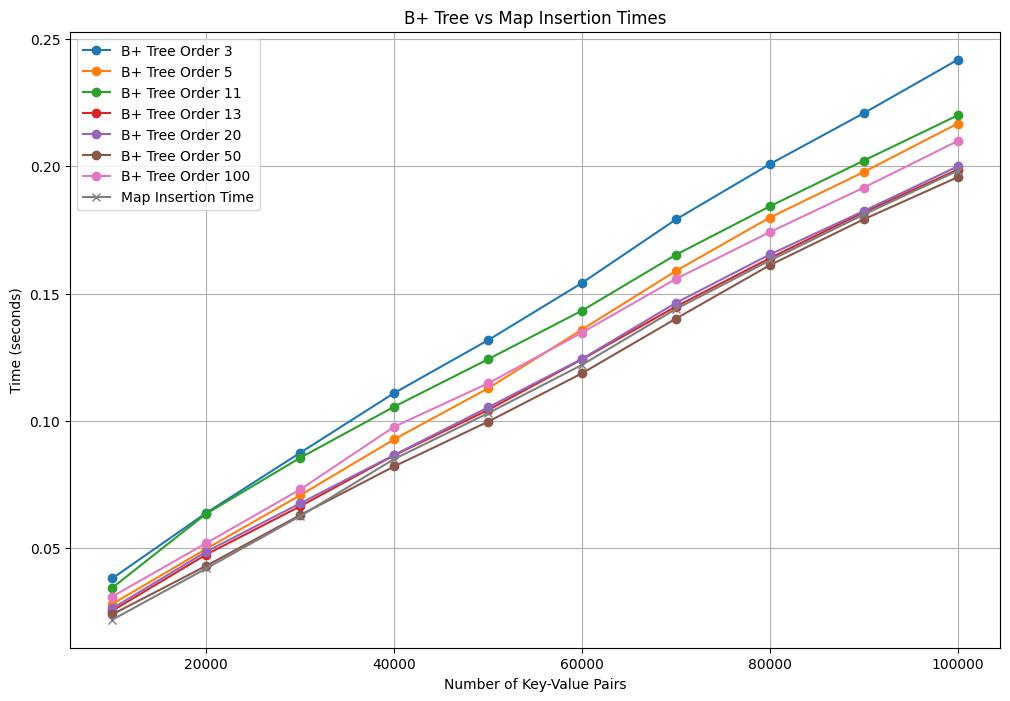

In [21]:
import matplotlib.pyplot as plt

def parse_timing_file(filename):
    bpt_data = {}
    map_sizes = []
    map_times = []

    with open(filename, 'r') as f:
        for line in f:
            if "B+Tree" in line:
                parts = line.split(",")
                order = int(line.split("Order ")[1].split(")")[0])
                size = int(parts[0].split(":")[-1].strip())
                time = float(parts[1].split(":")[-1].strip().replace("s", ""))
                if order not in bpt_data:
                    bpt_data[order] = ([], [])
                bpt_data[order][0].append(size)
                bpt_data[order][1].append(time)
            elif "Map" in line:
                parts = line.split(",")
                size = int(parts[0].split(":")[-1].strip())
                time = float(parts[1].split(":")[-1].strip().replace("s", ""))
                map_sizes.append(size)
                map_times.append(time)

    return bpt_data, map_sizes, map_times

def plot_times(bpt_data, map_sizes, map_times):
    plt.figure(figsize=(12, 8))

    for order, (sizes, times) in bpt_data.items():
        plt.plot(sizes, times, label=f"B+ Tree Order {order}", marker="o")

    plt.plot(map_sizes, map_times, label="Map Insertion Time", marker="x")
    plt.xlabel("Number of Key-Value Pairs")
    plt.ylabel("Time (seconds)")
    plt.title("B+ Tree vs Map Insertion Times")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    filename = "Test3/timing_results.txt"
    bpt_data, map_sizes, map_times = parse_timing_file(filename)
    plot_times(bpt_data, map_sizes, map_times)


## Insertion Times for different orders

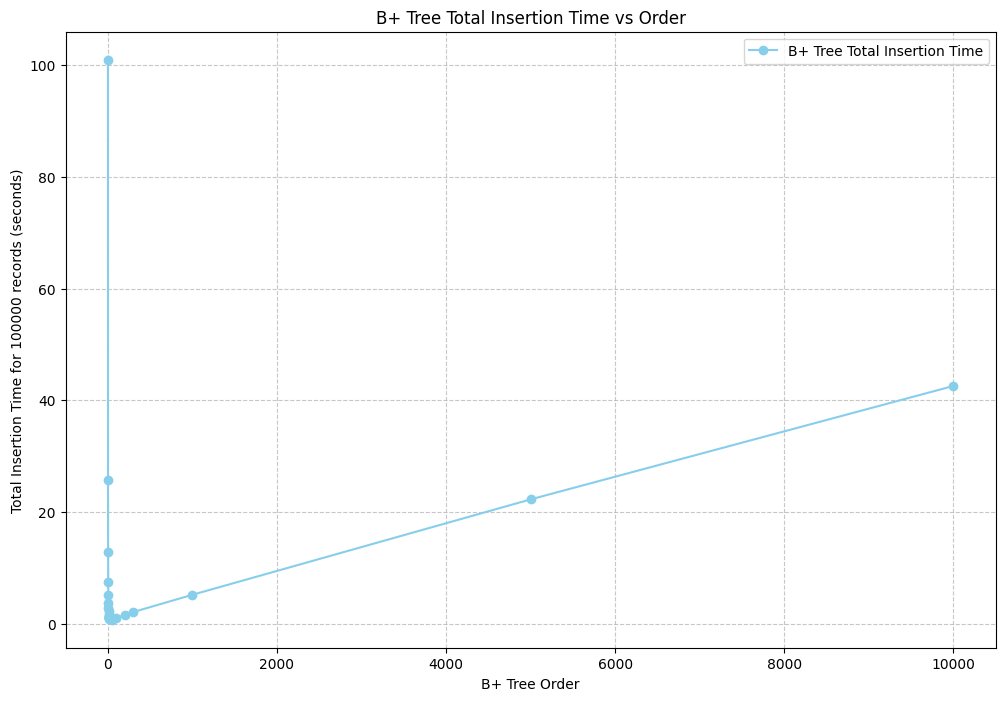

In [27]:
import matplotlib.pyplot as plt

def parse_total_times_file(filename):
    orders = []
    times = []

    with open(filename, 'r') as f:
        for line in f:
            if "B+Tree" in line:
                parts = line.split(" ")
                order = int(parts[2].strip('()'))
                time = float(parts[-1].strip('s\n'))

                orders.append(order)
                times.append(time)

    return orders, times

def plot_total_times(orders, times):
    plt.figure(figsize=(12, 8))
    plt.plot(orders, times, marker="o", color="skyblue", label="B+ Tree Total Insertion Time")
    plt.xlabel("B+ Tree Order")
    plt.ylabel("Total Insertion Time for 100000 records (seconds)")
    plt.title("B+ Tree Total Insertion Time vs Order")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    filename = "./_Output/bpt_total_times.txt"
    orders, times = parse_total_times_file(filename)
    plot_total_times(orders, times)


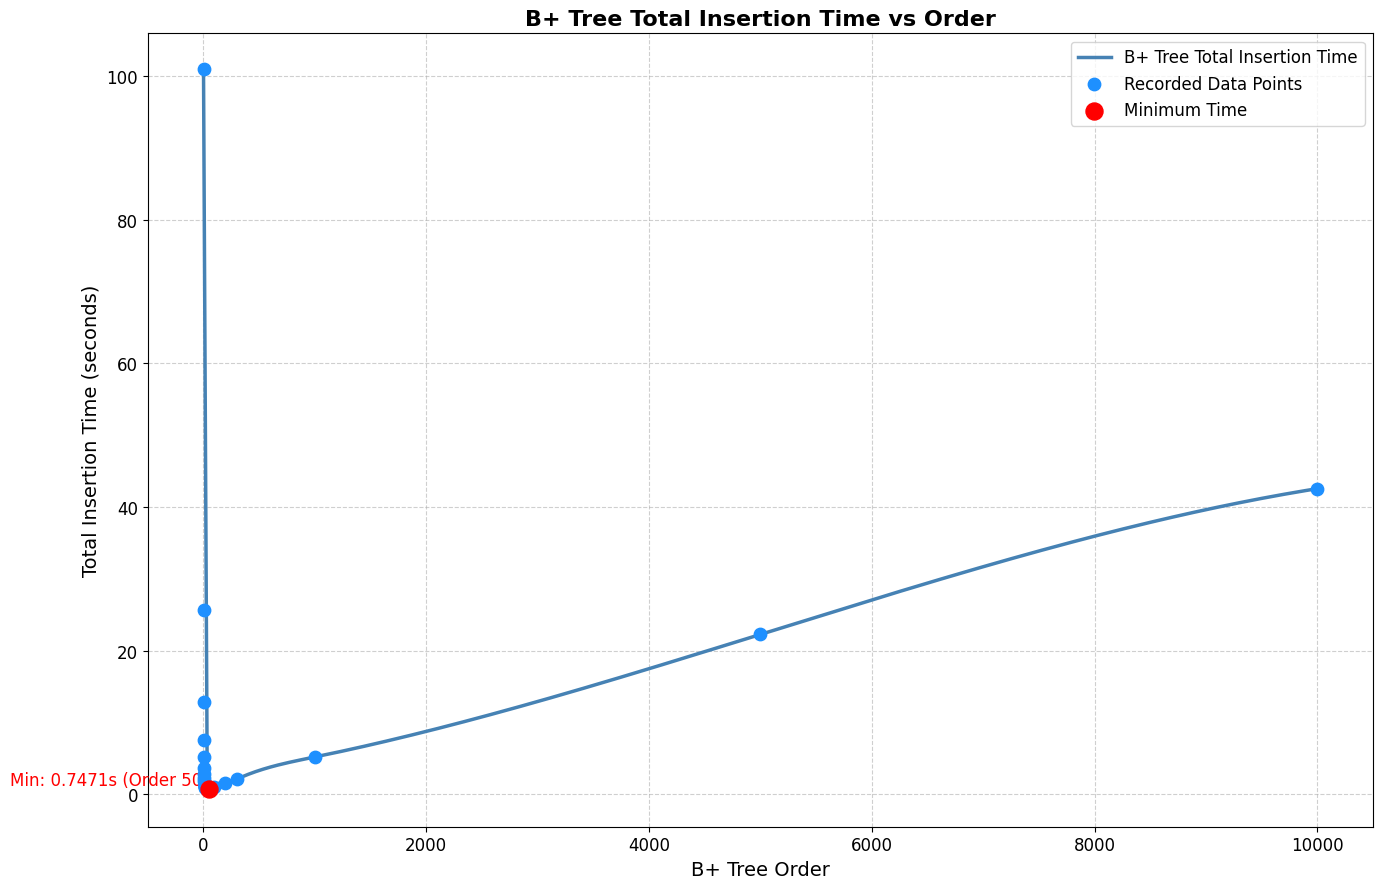

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def parse_total_times_file(filename):
    orders = []
    times = []

    with open(filename, 'r') as f:
        for line in f:
            if "B+Tree" in line:
                parts = line.split(" ")
                order = int(parts[2].strip('()'))
                time = float(parts[-1].strip('s\n'))
                orders.append(order)
                times.append(time)

    return orders, times

def plot_total_times(orders, times):
    plt.figure(figsize=(14, 9))
    
    # Smoothing the curve
    orders_np = np.array(orders)
    times_np = np.array(times)
    orders_smooth = np.linspace(orders_np.min(), orders_np.max(), 300)
    times_smooth = make_interp_spline(orders_np, times_np)(orders_smooth)

    # Plot with interpolation
    plt.plot(orders_smooth, times_smooth, color="steelblue", lw=2.5, label="B+ Tree Total Insertion Time")
    plt.scatter(orders, times, color="dodgerblue", s=80, zorder=5, label="Recorded Data Points")

    # Highlight the minimum point
    min_idx = np.argmin(times_np)
    plt.scatter(orders_np[min_idx], times_np[min_idx], color="red", s=150, zorder=10, label="Minimum Time")
    plt.text(orders_np[min_idx], times_np[min_idx], f"Min: {times_np[min_idx]:.4f}s (Order {orders_np[min_idx]})", 
             fontsize=12, color="red", ha="right", va="bottom")

    # Formatting the plot
    plt.xlabel("B+ Tree Order", fontsize=14)
    plt.ylabel("Total Insertion Time (seconds)", fontsize=14)
    plt.title("B+ Tree Total Insertion Time vs Order", fontsize=16, fontweight="bold")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    filename = "./_Output/bpt_total_times.txt"
    orders, times = parse_total_times_file(filename)
    plot_total_times(orders, times)


## B+Tree Insertion Time by Number of Inserted Elements

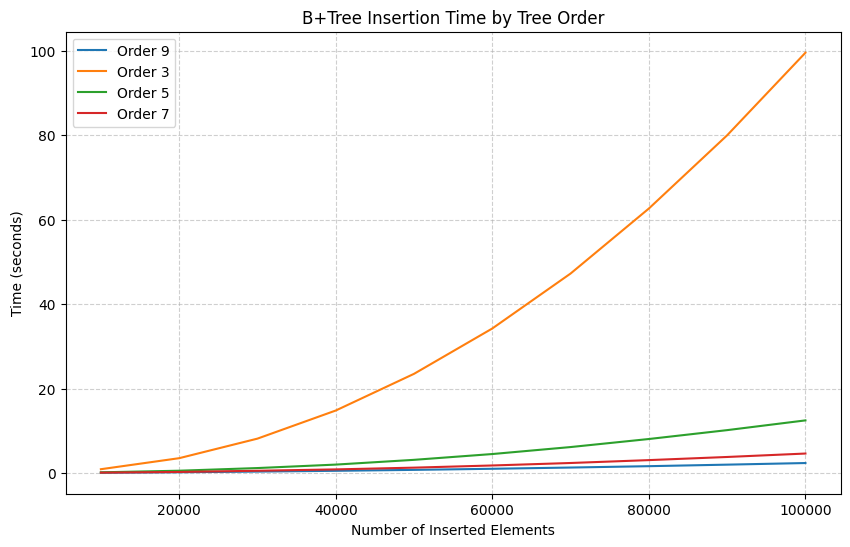

In [39]:
import matplotlib.pyplot as plt
import re

# Define the path to the timing results file
timing_file = "./_Output/timing_results.txt"

# Initialize data containers
orders = []
sizes = []
times = []

# Read and parse the file
try:
    with open(timing_file, "r") as file:
        for line in file:
            match = re.search(r"B\+Tree \(Order (\d+)\) size: (\d+), Time: ([\d\.]+)s", line)
            if match:
                
                order = int(match.group(1))
                size = int(match.group(2))
                time = float(match.group(3))
                if order > 10:
                    continue
                orders.append(order)
                sizes.append(size)
                times.append(time)



    # Create the plot
    plt.figure(figsize=(10, 6))
    for order in set(orders):
        order_sizes = [sizes[i] for i in range(len(orders)) if orders[i] == order]
        order_times = [times[i] for i in range(len(orders)) if orders[i] == order]
        plt.plot(order_sizes, order_times, label=f"Order {order}")

    plt.title("B+Tree Insertion Time by Tree Order")
    plt.xlabel("Number of Inserted Elements")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

except FileNotFoundError:
    print(f"File {timing_file} not found. Make sure the path is correct.")


## Average B+Tree Insertion Time by Tree Order

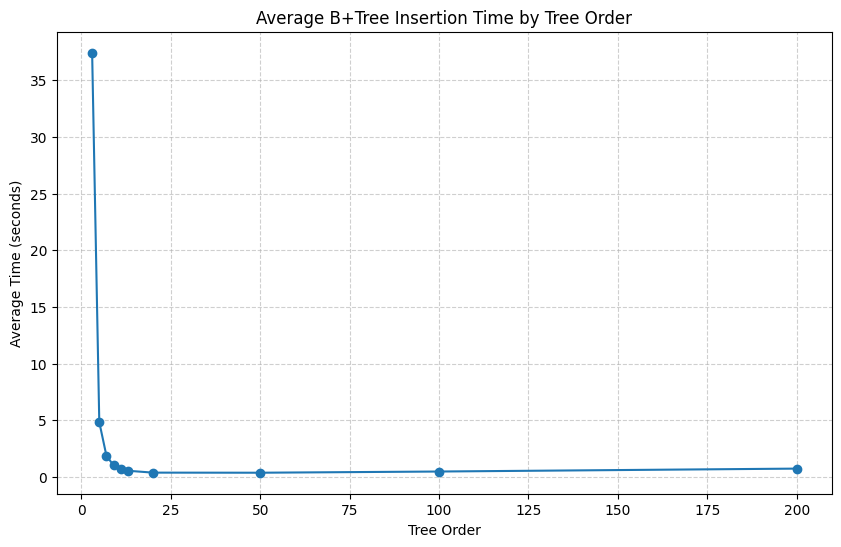

In [36]:
import matplotlib.pyplot as plt
import re
from collections import defaultdict

# Define the path to the timing results file
timing_file = "./_Output/timing_results.txt"

# Initialize data containers
order_times_map = defaultdict(list)

# Read and parse the file
try:
    with open(timing_file, "r") as file:
        for line in file:
            match = re.search(r"B\+Tree \(Order (\d+)\) size: (\d+), Time: ([\d\.]+)s", line)
            if match:
                order = int(match.group(1))
                time = float(match.group(3))
                order_times_map[order].append(time)

    # Calculate averages
    avg_times = {order: sum(times) / len(times) for order, times in order_times_map.items()}

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(list(avg_times.keys()), list(avg_times.values()), marker='o')

    plt.title("Average B+Tree Insertion Time by Tree Order")
    plt.xlabel("Tree Order")
    plt.ylabel("Average Time (seconds)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

except FileNotFoundError:
    print(f"File {timing_file} not found. Make sure the path is correct.")


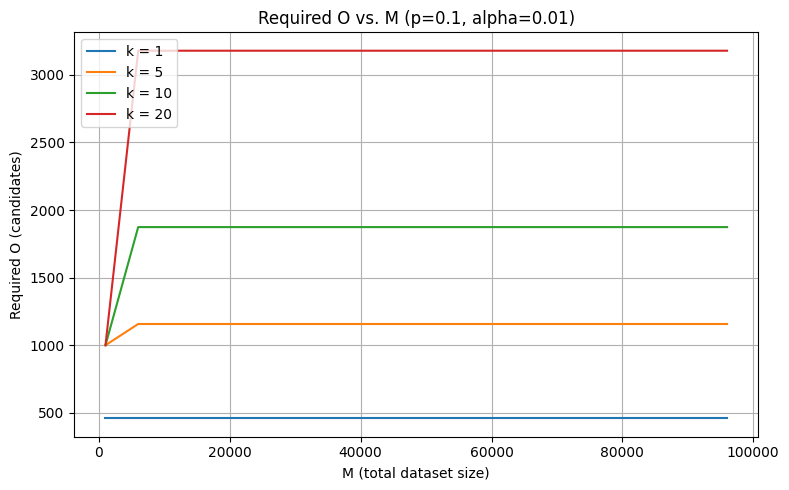

In [3]:
import math
import matplotlib.pyplot as plt

def binomial_coefficient(n, k):
    """Compute C(n, k) = n! / (k! * (n-k)!) safely."""
    if k > n:
        return 0.0
    if k == 0 or k == n:
        return 1.0
    # Use multiplicative approach to reduce overflow
    # Let k = min(k, n-k)
    k = min(k, n-k)
    result = 1.0
    for i in range(k):
        result *= (n - i) / (i + 1)
    return result

def binomial_pmf(n, k, p):
    """P(X = k) for X ~ Binomial(n, p)."""
    if p < 0 or p > 1:
        return 0.0
    return binomial_coefficient(n, k) * (p**k) * ((1-p)**(n-k))

def binomial_cdf_less_than(n, k, p):
    """P(X < k) for X ~ Binomial(n, p)."""
    total = 0.0
    for i in range(k):
        total += binomial_pmf(n, i, p)
    return total

def compute_required_O_binary_search(M, p, k, alpha):
    """
    Finds the smallest O in [k, M] such that P(X < k) <= alpha, 
    for X ~ Binomial(O, p).
    """
    if k <= 0:
        return 0
    if p <= 0:  # means no valid items
        return k
    if p >= 1:  # all items valid
        return k
    if alpha <= 0.0:
        return k
    
    left, right = k, M
    best = M
    while left <= right:
        mid = (left + right) // 2
        prob_less = binomial_cdf_less_than(mid, k, p)
        if prob_less <= alpha:
            best = mid
            right = mid - 1
        else:
            left = mid + 1
    
    return best

def main():
    # Parameters for the experiment
    alpha = 0.01
    p = 0.01         # Suppose 10% of items are "valid"
    M_values = range(1000, 100001, 5000)  # from 1k to 100k in steps of 5k
    k_values = [1, 5, 10, 20]            # different K demands

    # Dictionary to store results for each k
    results = {}

    for k in k_values:
        O_list = []
        for M in M_values:
            O = compute_required_O_binary_search(M, p, k, alpha)
            # optionally add a margin: O += 100
            O_list.append(O)
        results[k] = O_list
    
    # Plot
    plt.figure(figsize=(8, 5))
    for k in k_values:
        plt.plot(M_values, results[k], label=f'k = {k}')
    
    plt.title('Required O vs. M (p=0.1, alpha=0.01)')
    plt.xlabel('M (total dataset size)')
    plt.ylabel('Required O (candidates)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Save or show the figure
    plt.savefig('O_vs_M_and_k.pdf')  # or .png
    plt.show()

if __name__ == "__main__":
    main()


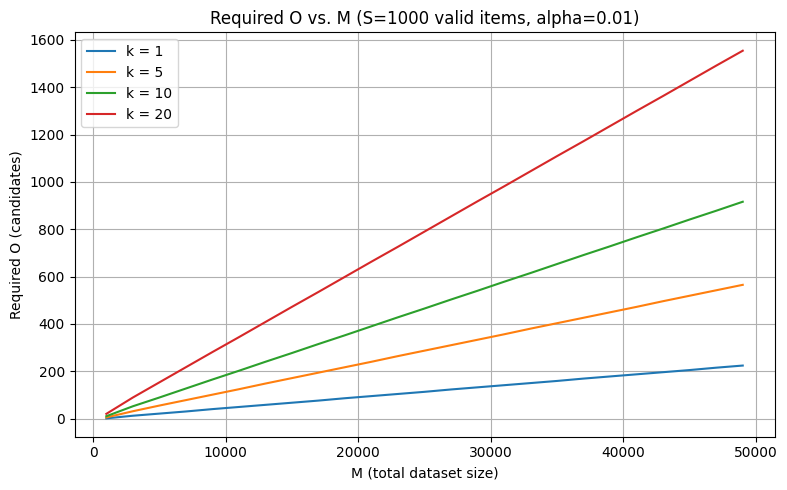

In [4]:
import math
import matplotlib.pyplot as plt

def binomial_coefficient(n, k):
    """Compute C(n, k) = n! / (k! * (n-k)!) safely."""
    if k > n:
        return 0.0
    if k == 0 or k == n:
        return 1.0
    k = min(k, n - k)
    result = 1.0
    for i in range(k):
        result *= (n - i) / (i + 1)
    return result

def binomial_pmf(n, k, p):
    """P(X = k) for X ~ Binomial(n, p)."""
    if p < 0 or p > 1:
        return 0.0
    return binomial_coefficient(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_cdf_less_than(n, k, p):
    """P(X < k) for X ~ Binomial(n, p)."""
    total = 0.0
    for i in range(k):
        total += binomial_pmf(n, i, p)
    return total

def compute_required_O_binary_search(M, p, k, alpha):
    """
    Finds the smallest O in [k, M] such that P(X < k) <= alpha, 
    for X ~ Binomial(O, p).
    """
    if k <= 0:
        return 0
    if p <= 0:
        # means no valid items, so you won't really find k>0
        return k
    if p >= 1:
        # all items valid
        return k
    if alpha <= 0.0:
        return k
    
    left, right = k, M
    best = M
    while left <= right:
        mid = (left + right) // 2
        prob_less = binomial_cdf_less_than(mid, k, p)
        if prob_less <= alpha:
            best = mid
            right = mid - 1
        else:
            left = mid + 1
    return best

def main():
    alpha = 0.01
    S = 1000    # fixed number of valid items
    M_values = range(1000, 50001, 2000)  # from 1k to 50k in steps of 2k
    k_values = [1, 5, 10, 20]
    
    results = {}
    for k in k_values:
        O_list = []
        for M in M_values:
            # Define p as S / M
            p = float(S) / float(M)
            # If S > M, p might exceed 1.0 (not typical, but let's handle it)
            if p > 1:
                p = 1.0
            
            O = compute_required_O_binary_search(M, p, k, alpha)
            # Optionally add a margin, e.g. O += 50
            O_list.append(O)
        results[k] = O_list
    
    # Plot
    plt.figure(figsize=(8, 5))
    for k in k_values:
        plt.plot(M_values, results[k], label=f'k = {k}')
    
    plt.title(f'Required O vs. M (S={S} valid items, alpha={alpha})')
    plt.xlabel('M (total dataset size)')
    plt.ylabel('Required O (candidates)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Save or show
    plt.savefig('O_vs_M_and_k_vary_p.pdf')
    plt.show()

if __name__ == "__main__":
    main()


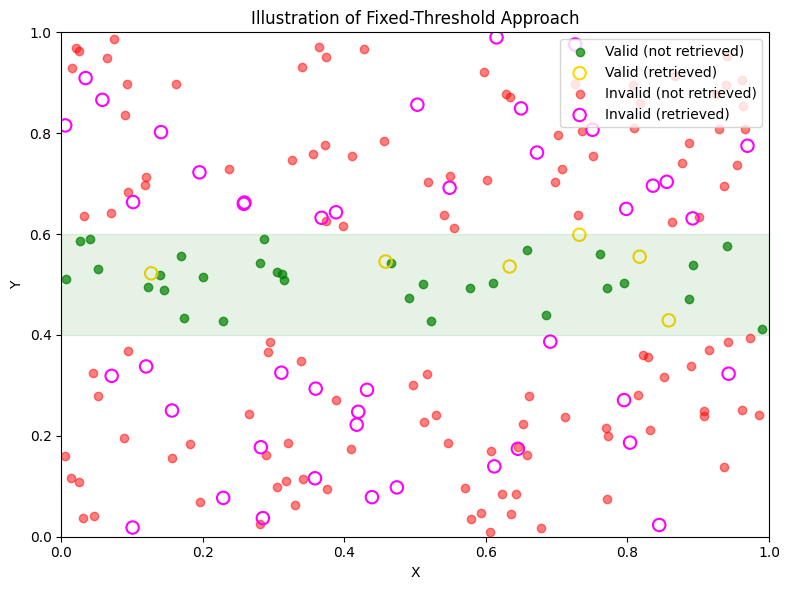

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def draw_fixed_threshold_figure(
    total_points=200,
    valid_count=30,
    O=50,
    s_min=0.4,
    s_max=0.6,
    seed=42
):
    """
    Illustrates a fixed-threshold approach where O candidates are chosen,
    but only a small subset actually meet the scalar condition (green band).
    """

    np.random.seed(seed)

    # Generate random 2D points in [0, 1] x [0, 1]
    points = np.random.rand(total_points, 2)

    # Identify points that fall within the scalar condition
    # Here, for simplicity, the condition is that y is in [s_min, s_max]
    valid_mask = (points[:, 1] >= s_min) & (points[:, 1] <= s_max)

    # Randomly select O "retrieved" candidates (indices)
    retrieved_indices = np.random.choice(total_points, size=O, replace=False)
    retrieved_mask = np.zeros(total_points, dtype=bool)
    retrieved_mask[retrieved_indices] = True

    # Plot all points
    plt.figure(figsize=(8, 6))

    # Plot valid points (green if not retrieved, gold if retrieved)
    plt.scatter(
        points[valid_mask & ~retrieved_mask, 0],
        points[valid_mask & ~retrieved_mask, 1],
        color="green",
        label="Valid (not retrieved)",
        alpha=0.7
    )
    plt.scatter(
        points[valid_mask & retrieved_mask, 0],
        points[valid_mask & retrieved_mask, 1],
        facecolors="none",
        edgecolors="gold",
        s=80,
        label="Valid (retrieved)",
        linewidth=1.5,
    )

    # Plot invalid points (red if not retrieved, magenta if retrieved)
    plt.scatter(
        points[~valid_mask & ~retrieved_mask, 0],
        points[~valid_mask & ~retrieved_mask, 1],
        color="red",
        label="Invalid (not retrieved)",
        alpha=0.5
    )
    plt.scatter(
        points[~valid_mask & retrieved_mask, 0],
        points[~valid_mask & retrieved_mask, 1],
        facecolors="none",
        edgecolors="magenta",
        s=80,
        label="Invalid (retrieved)",
        linewidth=1.5,
    )

    # Highlight the scalar condition region (y in [s_min, s_max]) as a semi-transparent rectangle
    plt.axhspan(s_min, s_max, color="green", alpha=0.1)

    plt.title("Illustration of Fixed-Threshold Approach")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_fixed_threshold_figure()


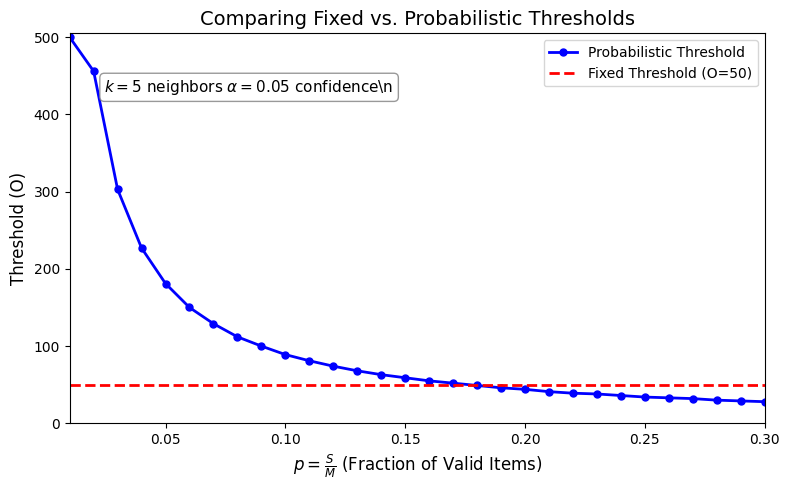

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import comb

def binomial_cdf(k, n, p):
    """
    Returns the probability P(X <= k) for a Binomial(n, p).
    i.e., the CDF for X ~ Binomial(n, p).
    """
    # sum_{i=0..k} C(n,i) * p^i * (1-p)^(n-i)
    cdf = 0.0
    for i in range(k+1):
        cdf += comb(n, i) * (p**i) * ((1 - p)**(n - i))
    return cdf

def minimum_O_for_confidence(p, k=5, alpha=0.05, max_search=500):
    """
    Given a probability p (i.e., fraction of valid items),
    find the smallest O such that:
        P(X >= k) >= 1 - alpha
    where X ~ Binomial(O, p).

    Returns O (integer).
    """
    target = 1 - alpha  # we want P(X >= k) >= target
    for O in range(k, max_search + 1):
        # P(X >= k) = 1 - P(X <= k-1)
        cdf_k_minus_1 = binomial_cdf(k - 1, O, p)
        if 1 - cdf_k_minus_1 >= target:
            return O
    return max_search  # If not found in the range, return max_search

def draw_probabilistic_threshold_comparison(
    p_values=None,
    k=5,
    alpha=0.05,
    fixed_O=50
):
    """
    Plots how the probabilistic threshold O depends on p,
    contrasted with a fixed threshold line.
    """

    if p_values is None:
        # Define a range of p from 0.01 to 0.3 (or any relevant range).
        p_values = np.linspace(0.01, 0.3, 30)

    # Compute O for each p using the probabilistic approach
    prob_threshold_O = []
    for p in p_values:
        required_O = minimum_O_for_confidence(p, k=k, alpha=alpha)
        prob_threshold_O.append(required_O)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(
        p_values, prob_threshold_O,
        marker='o', color='blue', linewidth=2, markersize=5,
        label="Probabilistic Threshold"
    )

    # Also plot a fixed threshold line for comparison
    plt.hlines(
        fixed_O, p_values[0], p_values[-1],
        color='red', linestyles='--', linewidth=2,
        label=f"Fixed Threshold (O={fixed_O})"
    )

    plt.title("Comparing Fixed vs. Probabilistic Thresholds", fontsize=14)
    plt.xlabel(r"$p = \frac{S}{M}$ (Fraction of Valid Items)", fontsize=12)
    plt.ylabel("Threshold (O)", fontsize=12)
    plt.xlim([p_values[0], p_values[-1]])
    plt.ylim([0, max(prob_threshold_O + [fixed_O]) + 5])

    plt.text(
        0.05, 0.85, 
        fr"$k={k}$ neighbors $\alpha={alpha}$ confidence\n",
        transform=plt.gca().transAxes,
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    )

    plt.legend(loc="upper right", fontsize=10)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_probabilistic_threshold_comparison()
